# Assignment 2
### Understanding Uncertainty
### Due 9/12

Finn Sjue
Afc9jk@virginia.edu

In [35]:
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request, zipfile, os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    else:
        print("Download file already exists")
        
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    else:
        print("Data directory already exists")

download_data()

Download file already exists
Data directory already exists


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

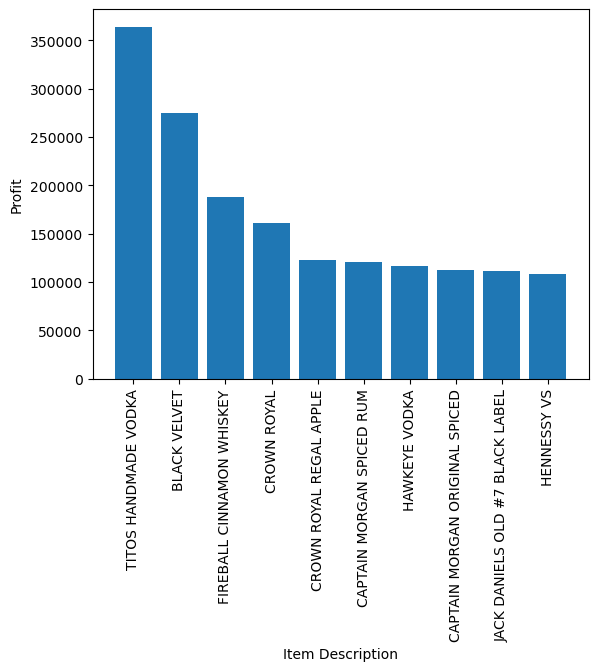

In [37]:
#The most profitable item should be determined by the Bottle Retail - Bottle cost * Bottles sold, summed over every sale by item
df = pd.read_csv('data/iowa.csv')
df['margin'] = df['State Bottle Retail'] - df['State Bottle Cost']
df['profit'] = df['margin'] * df['Bottles Sold']
prof = df.groupby('Item Description')['profit'].sum().sort_values(ascending=False)

plt.bar(prof.head(10).index, prof.head(10))
plt.xticks(rotation=90)
plt.xlabel('Item Description')
plt.ylabel('Profit')
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [38]:
import numpy as np
x = np.array([1,3,5])
y = np.array([2,5])

#x - y
#We get an error that the shapes are incompatible

print(x.reshape(-1,1)-y.reshape(1,-1))
#This gives us a 2x3 matrix where the first column is each element of x minus the first element of y, and the second column 
#is each element of x minus the second element of y

print(x.reshape(1,-1)-y.reshape(-1,1))
#This operation gives us the transpose of the above calculation, with all the same numbers

z = np.zeros((3, 2))
for i in range(len(x)):
    for j in range(len(y)):
        z[i-1,j-1]=(x[i-1]-y[j-1])
print(z)

m = np.zeros((2, 3))
for i in range(len(x)):
    for j in range(len(y)):
        m[j-1,i-1]=(x[i-1]-y[j-1])
print(m)

#x.reshape(-1,1) makes the array into a column vector
#x.reshape(1,-1) makes the array a row vector

[[-1 -4]
 [ 1 -2]
 [ 3  0]]
[[-1  1  3]
 [-4 -2  0]]
[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
[[-1.  1.  3.]
 [-4. -2.  0.]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

We know that $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ because $\mathbb{I}\{ x \le z \}$ will evaluate to 1 when x is less than z, so subtracting that from 1 gives us 0 when x is less than z. This is the same as $\mathbb{I}\{ x > z \}$

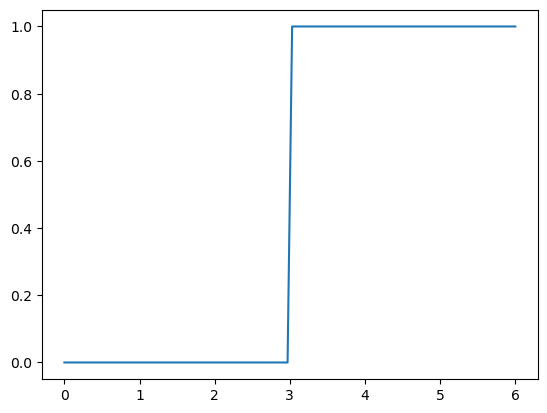

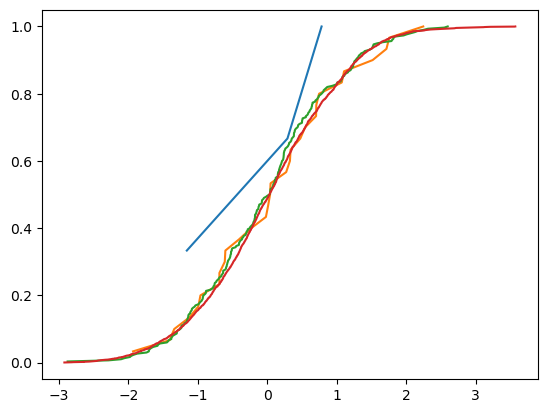

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
rng = np.random.default_rng(100)

z = np.linspace(0, 6, 100)
def indicate(z): 
    ''' Indicator function for computing ECDFs. '''
    return z > 3
plt.plot(z, indicate(z))
plt.show()

def ecdf(x, plot = True):
    Z = np.unique(np.sort(x))
    compare = x.reshape(-1,1) <= Z.reshape(1,-1)
    ecdf = np.mean(compare,axis=0)
    if plot:
        plt.plot(Z,ecdf)
    return ecdf, Z
#Code modeled from 01_visualizing_uncertainty_2.ipynb

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    ecdf(X)

#As the sample size N increases, the ECDF becomes smoother, and begins to look like a continuous CDF function

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

(0.0, 8.67, 12.99, 19.92, 3448.26, -8.205000000000004, 36.795)


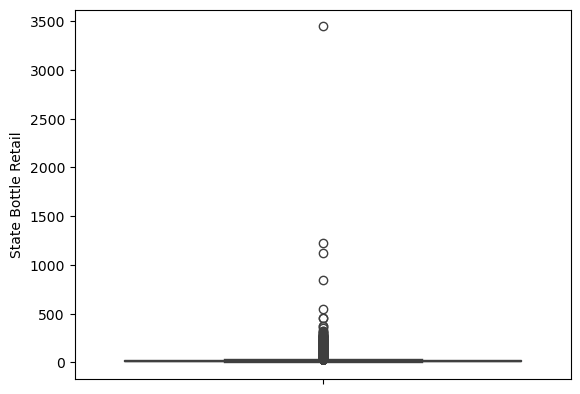

count    159904.000000
mean         16.480350
std          17.099067
min           0.000000
25%           8.670000
50%          12.990000
75%          19.920000
max        3448.260000
Name: State Bottle Retail, dtype: float64

In [56]:
def quantile(x, q):
    sort = sorted(x)
    index = q * (len(x)-1)
    if index % 1 == 0:
        return sort[int(index)]
    else:
        return sort[int(index)] + (sort[int(index)+1] - sort[int(index)]) * (index % 1)

def interquartile_range(x):
    upper, lower = quantile(x, 0.75), quantile(x, 0.25)
    whiskers = (upper-lower) * 1.5
    return lower, upper, lower - whiskers, upper + whiskers

def five_num(x):
    return min(x), quantile(x, 0.25), quantile(x, 0.5), quantile(x, 0.75), max(x), interquartile_range(x)[2], interquartile_range(x)[3]

def is_outlier(x):
    low_outlier = (x < interquartile_range(x)[2])
    high_outlier = (x > interquartile_range(x)[3])
    
    return bool((low_outlier | high_outlier).any())


data = df['State Bottle Retail'].dropna()
print(five_num(data))
is_outlier(data)

sns.boxplot(data)
plt.show()
data.describe()

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?